# Loading Data

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
msg_df  = pd.read_csv("SMSSpamCollection", sep  ='\t', names = ['target', 'text'])


In [4]:
msg_df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
msg_df.shape

(5572, 2)

# Exploratry Data Analysis

In [6]:
msg_df['target'].value_counts()

ham     4825
spam     747
Name: target, dtype: int64

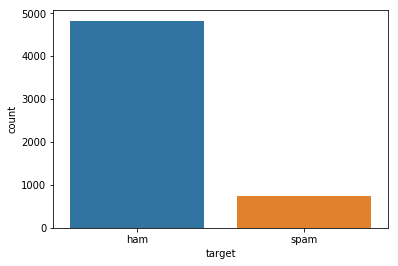

In [7]:
sns.countplot(x = 'target', data = msg_df)
plt.show()

In [8]:
from wordcloud import WordCloud , STOPWORDS

In [9]:
spam_df  = msg_df.loc[msg_df['target'] == 'spam', :]

words = ' '.join(spam_df['text'])

cleaned_words = " ".join([word for word in words.split()
                         if 'http' not in word])

In [10]:
wordcloud = WordCloud(stopwords = STOPWORDS,
                     background_color = 'black',
                     width  =1600,
                     height = 800).generate(cleaned_words)


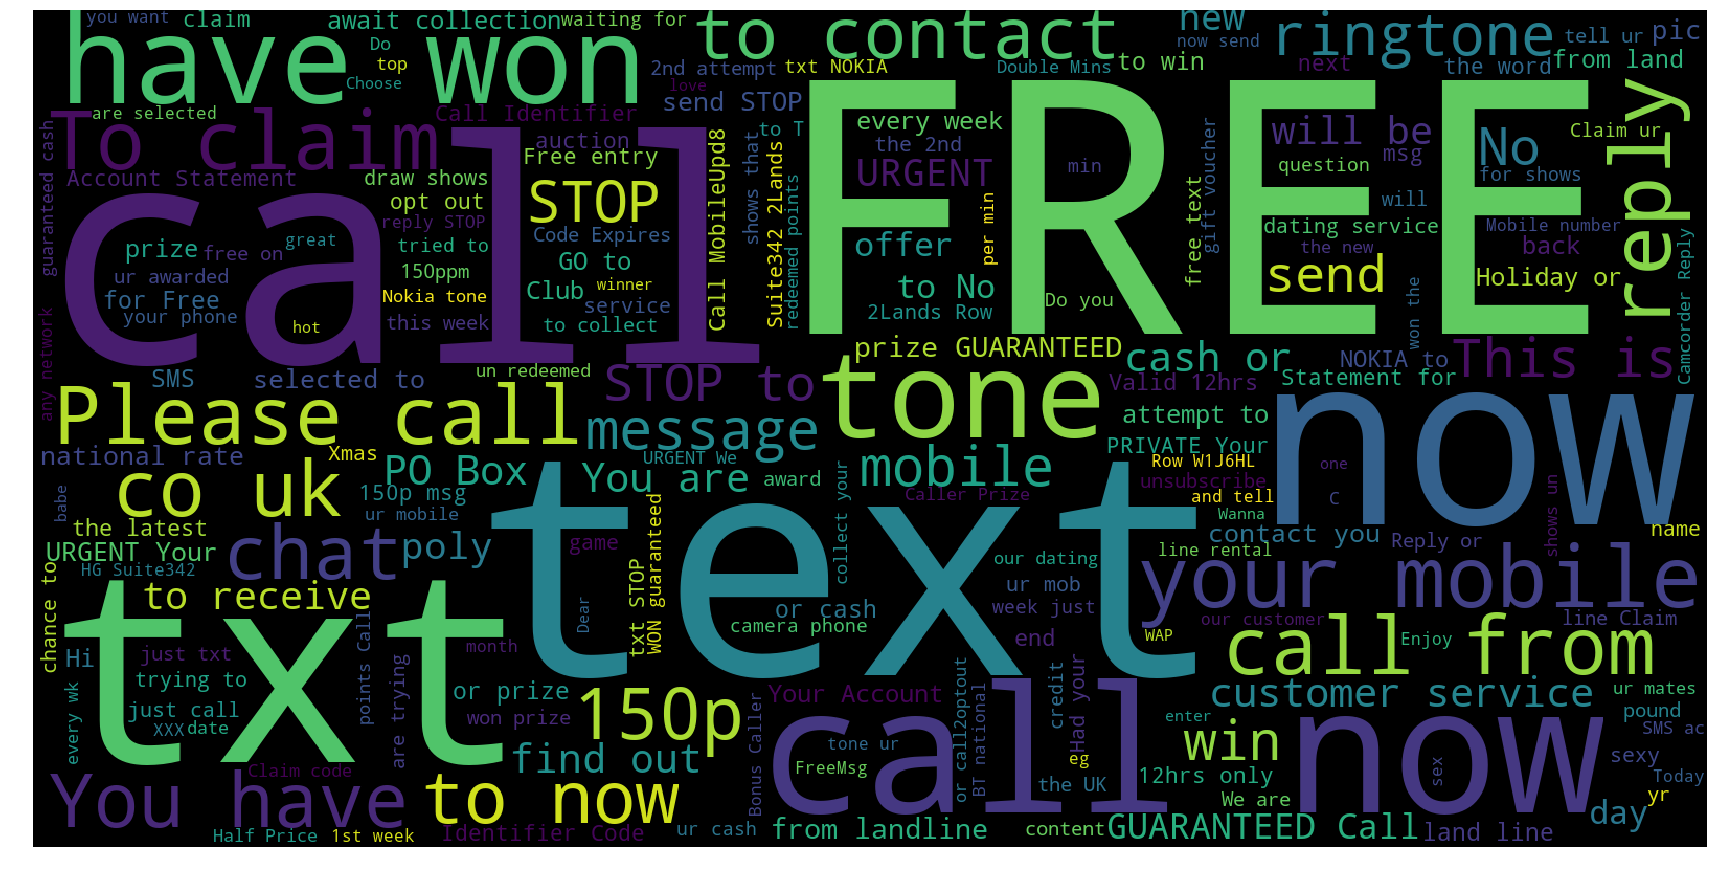

In [11]:
plt.figure(1, figsize = (30,20))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# Data Preprocessing

In [12]:
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [13]:
stemmer = PorterStemmer()

lemmatizer  = WordNetLemmatizer()

In [14]:
clean_msg = []

msg_len = []

In [15]:
def preprocessing(raw_msg, flag):
    
    # Removing special characters
    letters_only = re.sub("[^a-zA-Z]", ' ', raw_msg)
    
    # Conveting into small letters
    letters_only = letters_only.lower()
    
    # Tokenization
    words = letters_only.split()
    
    # Removing Stop words
    words = [ w for w in words if not  w in stopwords.words('english')]
    
    # Stemming and Lemmatization
    if (flag == 'stem'):
        words = [stemmer.stem(word) for word in words] 
    else : 
        words = [lemmatizer.lemmatize(word) for word in words]
        
    clean_msg.append(" ".join(words))
    msg_len.append(len(words))

In [16]:
msg_df['detect'] = msg_df['target'].apply(lambda x: 0 if x=='ham' else 1)

In [17]:
%%time

clean_msg = []

msg_len = []

msg_df['text'].apply(lambda x : preprocessing(x, 'stem'))

msg_df['clean_text_stem'] = clean_msg

msg_df['clean_length_stem'] = msg_len

Wall time: 55.9 s


In [18]:
%%time

clean_msg  =[]

msg_len = []

msg_df['text'].apply(lambda x : preprocessing( x, 'lemma'))

msg_df['clean_text_lemma'] = clean_msg

msg_df['clean_len_lemma'] = msg_len

Wall time: 58.3 s


In [19]:
msg_df.head()

,target,text,detect,clean_text_stem,clean_length_stem,clean_text_lemma,clean_len_lemma
0,ham,"Go until jurong point, crazy.. Available only ...",0,go jurong point crazi avail bugi n great world...,16,go jurong point crazy available bugis n great ...,16
1,ham,Ok lar... Joking wif u oni...,0,ok lar joke wif u oni,6,ok lar joking wif u oni,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,free entri wkli comp win fa cup final tkt st m...,21,free entry wkly comp win fa cup final tkts st ...,21
3,ham,U dun say so early hor... U c already then say...,0,u dun say earli hor u c alreadi say,9,u dun say early hor u c already say,9
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,nah think goe usf live around though,7,nah think go usf life around though,7


# Data Prepration

In [20]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(msg_df, train_size = 0.7, random_state  = 42)

In [21]:
train_clean_msg = []
for msg in train['clean_text_stem']:
    train_clean_msg.append(msg)
    
test_clean_msg = []
for msg in test['clean_text_stem']:
    test_clean_msg.append(msg)

In [22]:
# Converting text into numerical

from sklearn .feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = 'word')

train_features = vectorizer.fit_transform(train_clean_msg)

test_features = vectorizer.transform(test_clean_msg)

In [23]:
vectorizer.vocabulary_

{'quit': 3629,
 'late': 2478,
 'lar': 2473,
 'ard': 230,
 'anyway': 197,
 'wun': 5187,
 'drivin': 1263,
 'tuesday': 4751,
 'night': 3048,
 'real': 3684,
 'go': 1814,
 'chase': 735,
 'run': 3848,
 'cross': 985,
 'street': 4343,
 'say': 3908,
 'never': 3025,
 'answer': 180,
 'text': 4538,
 'confirm': 900,
 'deni': 1106,
 'still': 4320,
 'work': 5146,
 'small': 4145,
 'hous': 2075,
 'think': 4577,
 'could': 946,
 'stop': 4329,
 'like': 2545,
 'hour': 2073,
 'roommat': 3823,
 'look': 2599,
 'stock': 4321,
 'trip': 4729,
 'lol': 2588,
 'great': 1876,
 'im': 2150,
 'get': 1776,
 'hungri': 2103,
 'would': 5159,
 'good': 1833,
 'phone': 3368,
 'tomo': 4667,
 'lunchtim': 2650,
 'shall': 4007,
 'organis': 3215,
 'someth': 4189,
 'yesterday': 5240,
 'true': 4737,
 'ya': 5214,
 'nice': 3041,
 'readi': 3683,
 'thursday': 4607,
 'hi': 2006,
 'way': 5008,
 'day': 1052,
 'normal': 3082,
 'ur': 4855,
 'uniqu': 4824,
 'hope': 2058,
 'know': 2427,
 'rest': 3773,
 'mylif': 2966,
 'find': 1572,
 'wot': 515

In [24]:
print("Total Unique Words : ", len(vectorizer.vocabulary_))

print('Train Features :', type(train_features))

print("Shape of input data  : " , train_features.shape)

Total Unique Words :  5286
Train Features : <class 'scipy.sparse.csr.csr_matrix'>
Shape of input data  :  (3900, 5286)


# Building Model

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics

In [26]:
Classifiers = [LogisticRegression() , DecisionTreeClassifier(), SVC()]


In [27]:
dense_features = train_features.toarray()

dense_test = test_features.toarray()

# Evaluation

Accuracy of LogisticRegression is 0.9826555023923444


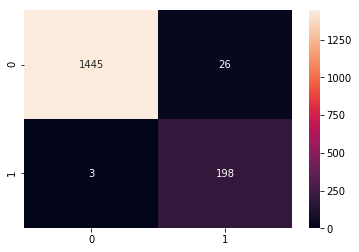

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1471
           1       0.88      0.99      0.93       201

   micro avg       0.98      0.98      0.98      1672
   macro avg       0.94      0.98      0.96      1672
weighted avg       0.98      0.98      0.98      1672

Accuracy of DecisionTreeClassifier is 0.9784688995215312


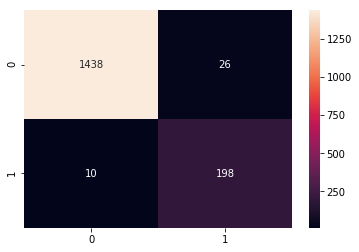

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1464
           1       0.88      0.95      0.92       208

   micro avg       0.98      0.98      0.98      1672
   macro avg       0.94      0.97      0.95      1672
weighted avg       0.98      0.98      0.98      1672

Accuracy of SVC is 0.8660287081339713


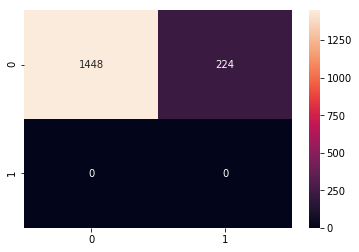

              precision    recall  f1-score   support

           0       1.00      0.87      0.93      1672
           1       0.00      0.00      0.00         0

   micro avg       0.87      0.87      0.87      1672
   macro avg       0.50      0.43      0.46      1672
weighted avg       1.00      0.87      0.93      1672

Wall time: 1min 57s


C:\Users\Aatif Khan Pathan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Aatif Khan Pathan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\Aatif Khan Pathan\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [28]:
%%time


for classifier in Classifiers:
    fit = classifier.fit(dense_features,train['detect'])
    
    pred = fit.predict(dense_test)
    
    accuracy = metrics.accuracy_score(pred,test['detect'])
    
    print('Accuracy of '+classifier.__class__.__name__+' is '+str(accuracy))    
    
    conf_matrix = metrics.confusion_matrix(pred,test['detect'])
    
    sns.heatmap(conf_matrix, annot = True, fmt = 'd')
    plt.show()
    
    print( metrics.classification_report(pred, test['detect']) )
    